# Active learning in logistic regression

In [96]:
#Preliminaries
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import urllib.request
import os, sys
from sklearn.gaussian_process import GaussianProcessClassifier
# Load dummy data
from sklearn.datasets import load_iris

np.random.seed(1) # random seed to ensure same results but feel free to change

# Generate dummy data and make more than one class appear in the train set
X, y = load_iris(return_X_y=True)
N = len(X)
p = np.random.permutation(len(X))
X = X[p]
y = y[p]

In [97]:
#divide up into training pool for pool based active learnng
#husk at indsætte np.concatenate med rigtig data, se den originale notebook
Xtest=X[:int(0.8*N)]
ytest=y[:int(0.8*N)]
Xpool=X[int(0.8*N):]
ypool=y[int(0.8*N):]

We then define a gaussian process classification model using sklearn and investigate how performance change when gradually increasing the training set randomly.

In [98]:
gp = GaussianProcessClassifier()

addn=2 #samples to add each time
#randomize order of pool to avoid sampling the same subject sequentially
order=np.random.permutation(range(len(ypool)))

In [99]:
#samples in the pool
poolidx=np.arange(len(Xpool),dtype=np.int)
ninit = 10 #initial samples
#initial training set
trainset=order[:ninit]
Xtrain=np.take(Xpool,trainset,axis=0)
ytrain=np.take(ypool,trainset,axis=0)
#remove data from pool
poolidx=np.setdiff1d(poolidx,trainset)

model=gp
testacc=[]
for i in range(25):
    model.fit(np.take(Xpool,order[:ninit+i*addn],axis=0),np.take(ypool,order[:ninit+i*addn],axis=0))
    ye=model.predict(Xtest)
    testacc.append((ninit+i*addn,sklearn.metrics.accuracy_score(ytest,ye)))
    print('Model: GP, %i random samples'%(ninit+i*addn))

Model: GP, 10 random samples
Model: GP, 12 random samples
Model: GP, 14 random samples
Model: GP, 16 random samples
Model: GP, 18 random samples
Model: GP, 20 random samples
Model: GP, 22 random samples
Model: GP, 24 random samples
Model: GP, 26 random samples
Model: GP, 28 random samples
Model: GP, 30 random samples
Model: GP, 32 random samples
Model: GP, 34 random samples
Model: GP, 36 random samples
Model: GP, 38 random samples
Model: GP, 40 random samples
Model: GP, 42 random samples
Model: GP, 44 random samples
Model: GP, 46 random samples
Model: GP, 48 random samples
Model: GP, 50 random samples
Model: GP, 52 random samples
Model: GP, 54 random samples
Model: GP, 56 random samples
Model: GP, 58 random samples


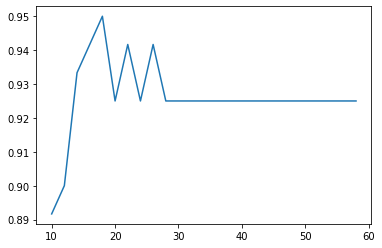

In [100]:
#Plot learning curve
plt.plot(*tuple(np.array(testacc).T));

# Uncertainty sampling
Using the three different uncertainty measures to attempt to get smarter samles and therefore a better accuracy.

## Least Confident

In [101]:
    testacc_al_LC=[]
    trainset=order[:ninit]
    Xtrain=np.take(Xpool,trainset,axis=0)
    ytrain=np.take(ypool,trainset,axis=0)
    poolidx=np.arange(len(Xpool),dtype=np.int)
    poolidx=np.setdiff1d(poolidx,trainset)
    for i in range(25):
        model.fit(Xtrain,ytrain)
        ye=model.predict(Xtest)
        testacc_al_LC.append((len(Xtrain),sklearn.metrics.accuracy_score(ytest,ye)))
        ypool_p = model.predict_proba(Xpool[poolidx])
        ypool_p_sort_idx = np.argsort(1-ypool_p.max(1)) #least confident 
        Xtrain=np.concatenate((Xtrain,Xpool[poolidx[ypool_p_sort_idx[-addn:]]]))
        ytrain=np.concatenate((ytrain,ypool[poolidx[ypool_p_sort_idx[-addn:]]]))
        poolidx=np.setdiff1d(poolidx,ypool_p_sort_idx[-addn:])
        print('Model: GP, %i samples (uncertainty sampling)'%(len(Xtrain)))

Model: GP, 12 samples (uncertainty sampling)
Model: GP, 14 samples (uncertainty sampling)
Model: GP, 16 samples (uncertainty sampling)
Model: GP, 18 samples (uncertainty sampling)
Model: GP, 20 samples (uncertainty sampling)
Model: GP, 22 samples (uncertainty sampling)
Model: GP, 24 samples (uncertainty sampling)
Model: GP, 26 samples (uncertainty sampling)
Model: GP, 28 samples (uncertainty sampling)
Model: GP, 30 samples (uncertainty sampling)
Model: GP, 32 samples (uncertainty sampling)
Model: GP, 34 samples (uncertainty sampling)
Model: GP, 36 samples (uncertainty sampling)
Model: GP, 38 samples (uncertainty sampling)
Model: GP, 40 samples (uncertainty sampling)
Model: GP, 42 samples (uncertainty sampling)
Model: GP, 44 samples (uncertainty sampling)
Model: GP, 46 samples (uncertainty sampling)
Model: GP, 48 samples (uncertainty sampling)
Model: GP, 50 samples (uncertainty sampling)
Model: GP, 52 samples (uncertainty sampling)
Model: GP, 54 samples (uncertainty sampling)
Model: GP,

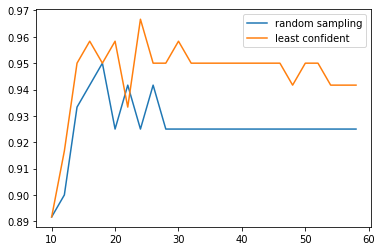

In [102]:
#Plot learning curve
plt.plot(*tuple(np.array(testacc).T));
plt.plot(*tuple(np.array(testacc_al_LC).T));
plt.legend(('random sampling','least confident'));

## Margin Sampling

In [103]:
testacc_al_M=[]
trainset=order[:ninit]
Xtrain=np.take(Xpool,trainset,axis=0)
ytrain=np.take(ypool,trainset,axis=0)
poolidx=np.arange(len(Xpool),dtype=np.int)
poolidx=np.setdiff1d(poolidx,trainset)
for i in range(25):
    model.fit(Xtrain,ytrain)
    ye=model.predict(Xtest)
    testacc_al_M.append((len(Xtrain),sklearn.metrics.accuracy_score(ytest,ye)))
    ypool_p = model.predict_proba(Xpool[poolidx])
    ypool_p_sort_idx = np.argsort(ypool_p.max(1)-ypool_p.min(1)) #margin sampling
    Xtrain=np.concatenate((Xtrain,Xpool[poolidx[ypool_p_sort_idx[:addn]]]))
    ytrain=np.concatenate((ytrain,ypool[poolidx[ypool_p_sort_idx[:addn]]]))
    poolidx=np.setdiff1d(poolidx,ypool_p_sort_idx[-addn:])
    print('Model: GP, %i samples (uncertainty sampling)'%(len(Xtrain)))

Model: GP, 12 samples (uncertainty sampling)
Model: GP, 14 samples (uncertainty sampling)
Model: GP, 16 samples (uncertainty sampling)
Model: GP, 18 samples (uncertainty sampling)
Model: GP, 20 samples (uncertainty sampling)
Model: GP, 22 samples (uncertainty sampling)
Model: GP, 24 samples (uncertainty sampling)
Model: GP, 26 samples (uncertainty sampling)
Model: GP, 28 samples (uncertainty sampling)
Model: GP, 30 samples (uncertainty sampling)
Model: GP, 32 samples (uncertainty sampling)
Model: GP, 34 samples (uncertainty sampling)
Model: GP, 36 samples (uncertainty sampling)
Model: GP, 38 samples (uncertainty sampling)
Model: GP, 40 samples (uncertainty sampling)
Model: GP, 42 samples (uncertainty sampling)
Model: GP, 44 samples (uncertainty sampling)
Model: GP, 46 samples (uncertainty sampling)
Model: GP, 48 samples (uncertainty sampling)
Model: GP, 50 samples (uncertainty sampling)
Model: GP, 52 samples (uncertainty sampling)
Model: GP, 54 samples (uncertainty sampling)
Model: GP,

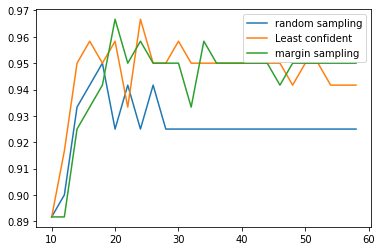

In [104]:
#Plot learning curve
plt.plot(*tuple(np.array(testacc).T));
plt.plot(*tuple(np.array(testacc_al_LC).T));
plt.plot(*tuple(np.array(testacc_al_M).T));
plt.legend(('random sampling','Least confident', 'margin sampling'));

## Entropy

In [105]:
testacc_al_E=[]
trainset=order[:ninit]
Xtrain=np.take(Xpool,trainset,axis=0)
ytrain=np.take(ypool,trainset,axis=0)
poolidx=np.arange(len(Xpool),dtype=np.int)
poolidx=np.setdiff1d(poolidx,trainset)
for i in range(25):
    model.fit(Xtrain,ytrain)
    ye=model.predict(Xtest)
    testacc_al_E.append((len(Xtrain),sklearn.metrics.accuracy_score(ytest,ye)))
    ypool_p = model.predict_proba(Xpool[poolidx])
    ypool_p_sort_idx = np.argsort(-(ypool_p[:,0]*np.log(ypool_p[:,0])+ypool_p[:,1]*np.log(ypool_p[:,1]))) #entropy
    Xtrain=np.concatenate((Xtrain,Xpool[poolidx[ypool_p_sort_idx[-addn:]]]))
    ytrain=np.concatenate((ytrain,ypool[poolidx[ypool_p_sort_idx[-addn:]]]))
    poolidx=np.setdiff1d(poolidx,ypool_p_sort_idx[-addn:])
    print('Model: GP, %i samples (uncertainty sampling)'%(len(Xtrain)))

Model: GP, 12 samples (uncertainty sampling)
Model: GP, 14 samples (uncertainty sampling)
Model: GP, 16 samples (uncertainty sampling)
Model: GP, 18 samples (uncertainty sampling)
Model: GP, 20 samples (uncertainty sampling)
Model: GP, 22 samples (uncertainty sampling)
Model: GP, 24 samples (uncertainty sampling)
Model: GP, 26 samples (uncertainty sampling)
Model: GP, 28 samples (uncertainty sampling)
Model: GP, 30 samples (uncertainty sampling)
Model: GP, 32 samples (uncertainty sampling)
Model: GP, 34 samples (uncertainty sampling)
Model: GP, 36 samples (uncertainty sampling)
Model: GP, 38 samples (uncertainty sampling)
Model: GP, 40 samples (uncertainty sampling)
Model: GP, 42 samples (uncertainty sampling)
Model: GP, 44 samples (uncertainty sampling)
Model: GP, 46 samples (uncertainty sampling)
Model: GP, 48 samples (uncertainty sampling)
Model: GP, 50 samples (uncertainty sampling)
Model: GP, 52 samples (uncertainty sampling)
Model: GP, 54 samples (uncertainty sampling)
Model: GP,

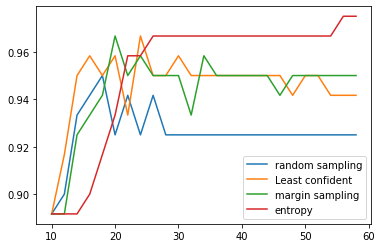

In [106]:
#Plot learning curve
plt.plot(*tuple(np.array(testacc).T));
plt.plot(*tuple(np.array(testacc_al_LC).T));
plt.plot(*tuple(np.array(testacc_al_M).T));
plt.plot(*tuple(np.array(testacc_al_E).T));
plt.legend(('random sampling','Least confident', 'margin sampling', 'entropy'));

# Query by commitee
Direct uncertainty sampling is only feasible for models that can provide realistic uncertainty estimates. As an alternative we can consider query by committee (QBC).

In the following train a committee of logistic regression models using bootstrapping (sampling with replacement). For this the function sklearn.util.resample, using stratify=ytrain as an option here will ensure that you don't end up with bootstrap samples with only one label.

The number of member models in the committee is a free parameters which will greatly affect the computational complexity, here something like 10 members should be sufficient. 

In [107]:
testacc_qbc=[]
ncomm=10
trainset=order[:ninit]
Xtrain=np.take(Xpool,trainset,axis=0)
ytrain=np.take(ypool,trainset,axis=0)
poolidx=np.arange(len(Xpool),dtype=np.int)
poolidx=np.setdiff1d(poolidx,trainset)
for i in range(25):
    ypool_lab=[]
    for k in range(ncomm):
        Xtr,ytr=sklearn.utils.resample(Xtrain,ytrain,stratify=ytrain)
        model.fit(Xtr, ytr)
        ypool_lab.append(model.predict(Xpool[poolidx]))
    ypool_p=(np.mean(np.array(ypool_lab)==1,0),np.mean(np.array(ypool_lab)==2,0))
    ypool_p=np.array(ypool_p).T
    model.fit(Xtrain,ytrain)
    ye=model.predict(Xtest)
    testacc_qbc.append((len(Xtrain),sklearn.metrics.accuracy_score(ytest,ye)))


    ypool_p_sort_idx = np.argsort(ypool_p.min(1)) #least confident
    Xtrain=np.concatenate((Xtrain,Xpool[poolidx[ypool_p_sort_idx[-addn:]]]))
    ytrain=np.concatenate((ytrain,ypool[poolidx[ypool_p_sort_idx[-addn:]]]))
    poolidx=np.setdiff1d(poolidx,ypool_p_sort_idx[-addn:])
    print('Model: GP, %i samples (QBC)'%(ninit+i*addn))


Model: GP, 10 samples (QBC)
Model: GP, 12 samples (QBC)
Model: GP, 14 samples (QBC)
Model: GP, 16 samples (QBC)
Model: GP, 18 samples (QBC)
Model: GP, 20 samples (QBC)
Model: GP, 22 samples (QBC)
Model: GP, 24 samples (QBC)
Model: GP, 26 samples (QBC)
Model: GP, 28 samples (QBC)
Model: GP, 30 samples (QBC)
Model: GP, 32 samples (QBC)
Model: GP, 34 samples (QBC)
Model: GP, 36 samples (QBC)
Model: GP, 38 samples (QBC)
Model: GP, 40 samples (QBC)
Model: GP, 42 samples (QBC)
Model: GP, 44 samples (QBC)
Model: GP, 46 samples (QBC)
Model: GP, 48 samples (QBC)
Model: GP, 50 samples (QBC)
Model: GP, 52 samples (QBC)
Model: GP, 54 samples (QBC)
Model: GP, 56 samples (QBC)
Model: GP, 58 samples (QBC)


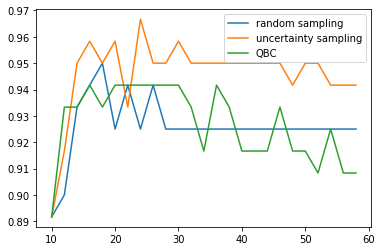

In [108]:
#Plot learning curve
plt.plot(*tuple(np.array(testacc).T));
plt.plot(*tuple(np.array(testacc_al_LC).T));
plt.plot(*tuple(np.array(testacc_qbc).T));
plt.legend(('random sampling','uncertainty sampling','QBC'));

# Expected model change
As a last alternative we will consider expected improvement estimated according to the size of the gradient of the model parameters (hence focus on samples which are expected to change the model the most).

In binary logistic regression the probability of the high class (label=2 in our example) is given by $$p(\boldsymbol{\hat x}|\hat y=2)=\frac{1}{1+\operatorname{exp}(-\boldsymbol\theta^\top \boldsymbol{\hat{x}})},$$
where $\boldsymbol{\hat x}$ is a new candidate sample from the unlabeled pool. Equivalently for the low class:
$$p(\boldsymbol{\hat x}|\hat y=1)=1-\frac{1}{1+\operatorname{exp}(-\boldsymbol\theta^\top \boldsymbol{\hat{x}})}=\frac{\operatorname{exp}(-\boldsymbol\theta^\top \boldsymbol{\hat{x}})}{1+\operatorname{exp}(-\boldsymbol\theta^\top \boldsymbol{\hat{x}})}.$$

Hence, the loss function then becomes:
$$\mathcal L(\boldsymbol{\hat x}|\hat y=2)=-\operatorname{log}(p(\boldsymbol{\hat x}|\hat y=2))=\operatorname{log}(1+\operatorname{exp}(-\boldsymbol\theta^\top \boldsymbol{\hat{x}})),$$ and
$$\mathcal L(\boldsymbol{\hat x}|\hat y=1)=-\operatorname{log}(p(\boldsymbol{\hat x}|\hat y=2))=\operatorname{log}(1+\operatorname{exp}(\boldsymbol\theta^\top \boldsymbol{\hat{x}})).$$


We now differentiate with respect to the parameters for each of these cases to obtain (you could of course also do this with automatic differentiation in pytorch, but for sake of example we do it analytically here, there are few basic manipulations of exponentials needed here to get this compact notation (note that the minus in $\operatorname{exp}(-\theta_i x_i)$ disappeared):
$$\frac{\delta \mathcal L(\boldsymbol{\hat x}|\hat y=2)}{\delta \theta_i}=\frac{- {\hat x_i}}{1+\operatorname{exp}(\theta_i {\hat{x_i}})},$$ and 
$$\frac{\delta \mathcal L(\boldsymbol{\hat x}|\hat y=1)}{\delta \theta_i}=\frac{{\hat x_i} \operatorname{exp}(\theta {\hat{x_i}})}{1+\operatorname{exp}(\theta_i {\hat{x_i}})}.$$

As we actually use the l2 penalized logistic regression here the complete cost function actually contains an additional shrinkage term $1/(2C) ||\theta||^2$. The complete derivatives are actually as follows:

$$\frac{\delta \mathcal{\tilde{L}}(\boldsymbol{\hat x}|\hat y=2)}{\delta \theta_i}=\frac{- {\hat x_i}}{1+\operatorname{exp}(\theta_i {\hat{x_i}})}+\theta_i/C,$$ and 
$$\frac{\delta \mathcal{\tilde{L}}(\boldsymbol{\hat x}|\hat y=1)}{\delta \theta_i}=\frac{{\hat x_i} \operatorname{exp}(\theta {\hat{x_i}})}{1+\operatorname{exp}(\theta_i {\hat{x_i}})}+\theta_i/C.$$


From this calculate the euclidean norm of the gradient and weight according to $p(\boldsymbol{\hat x})$. In accordance with the description in the notes the gradient of the points within the training set are close to zero as the model has converged to samples the training set, therefore we only need to evaluate this for each candidate point individually.

In our model is severely overparametrized as there are many features (voxels) out of which most are actually not relevant for classification. Therefore, this metric might not work well as the gradient will likely be dominated by unimportant voxels.
In such cases regularization can be important as well as preprocessing measures to ensure that features are appropriately normalized, which we did not consider in this exercise.

<font color=blue>Now use this expected improvement metric to suggest new samples from the pool,
and visualize the training curve.


In [109]:
testacc_emc=[]
trainset=order[:ninit]
Xtrain=np.take(Xpool,trainset,axis=0)
ytrain=np.take(ypool,trainset,axis=0)
poolidx=np.arange(len(Xpool),dtype=np.int)
poolidx=np.setdiff1d(poolidx,trainset)

def norm_grad_x(theta,x,C=1.):
    #probability of high class
  p1 = 1/(1+np.exp(-np.sum(theta*x)))
    #probability of low class
  p0 = 1-p1
    #derivative of cost as derived above for high class
  dL1=-x/(1+np.exp(theta*x))+theta/C
    #same for low class
  dL0=x*np.exp(theta*x)/(1+np.exp(theta*x))+theta/C
    #2-norm of these
  g1=np.sqrt(np.sum(dL1**2,1))
  g0=np.sqrt(np.sum(dL0**2,1))
    #averaged according to probabilities
  emc=p1*g1+p0*g0
  return emc

In [110]:
for i in range(25):
    ypool_lab=[]
    model.fit(Xtrain,ytrain)
    emc=norm_grad_x(model.coef_, Xpool[poolidx])
    ye=model.predict(Xtest)
    testacc_emc.append((len(Xtrain),sklearn.metrics.accuracy_score(ytest,ye)))


    ypool_p_sort_idx = np.argsort(emc)
    Xtrain=np.concatenate((Xtrain,Xpool[poolidx[ypool_p_sort_idx[-addn:]]]))
    ytrain=np.concatenate((ytrain,ypool[poolidx[ypool_p_sort_idx[-addn:]]]))
    poolidx=np.setdiff1d(poolidx,ypool_p_sort_idx[-addn:])
    print('Model: GP, %i samples (EMC)'%(ninit+i*addn))


AttributeError: 'GaussianProcessClassifier' object has no attribute 'coef_'

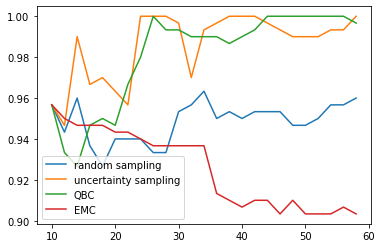

In [39]:
#Plot learning curve
plt.plot(*tuple(np.array(testacc).T));
plt.plot(*tuple(np.array(testacc_al_LC).T));
plt.plot(*tuple(np.array(testacc_qbc).T));
plt.plot(*tuple(np.array(testacc_emc).T));
plt.legend(('random sampling','uncertainty sampling','QBC','EMC'));


<font color=green> Here we see that the expected model change/impact is not doing a very good job here as already hinted above this is likely because the number of model parameters (weights) is very high and therefore the gradient will likely be dominated by unimportant voxels even if they have low weigth in the model.  